**Vishv Patel** <br>
**Student Number:** 8977662

## Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

#### **Goal**

The goal of this lab is to run a good EDA on fMNIST, train a neural network using Tensorflow, evaluate it using sklearn, and provide clear conclusions.

#### **Library Import**

In [438]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import random

#### **1. Load the Data**

* [Fashion Mnist](https://keras.io/api/datasets/fashion_mnist/) is a dataset of 60,000 28x28 grayscale images of the 10 different clothing style from (0-9) labels, along with a test set of 10,000 images.<br>

* We can import this dataset from tensorflow.keras.datasets <br>

* Data loaded as per [this tutorial](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03A_minimal_mnist_keras.ipynb)

In [439]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Split the validation data from training dataset
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#### **2. EDA**

In [440]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')

print('\nShapes:')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')

print('\nValidation Data:')
print(f'Images: {val_images.shape}')
print(f'Labels: {val_labels.shape}')

print('\nTest Data:') 
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')

print('\nImage Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>

Shapes:
Train Data:
Images: (48000, 28, 28)
Labels: (48000,)

Validation Data:
Images: (12000, 28, 28)
Labels: (12000,)

Test Data:
Images: (10000, 28, 28)
Labels: (10000,)

Image Data Range:
Min: 0
Max: 255


**Insights**

* Image Data Type: The image data is represented as a NumPy array (numpy.ndarray).
* Image and Label Element Data Type: The individual elements within the image arrays are of data type numpy.uint8, which typically represents unsigned integers ranging from 0 to 255.

* Train Data:<br>
Images: The training set contains 48,000 images, each with dimensions of 28x28 pixels.<br>
Labels: Corresponding to each image, there are 48,000 labels.<br>
* Validation Data:<br>
Images: The training set contains 12,000 images, each with dimensions of 28x28 pixels.<br>
Labels: Corresponding to each image, there are 12,000 labels.<br>
* Test Data:<br>
Images: The test set contains 10,000 images, also with dimensions of 28x28 pixels.<br>
Labels: Corresponding to each image in the test set, there are 10,000 labels.
* Image Data Range:
The pixel values in the images range from 0 to 255, indicating grayscale intensity where 0 represents black and 255 represents white.

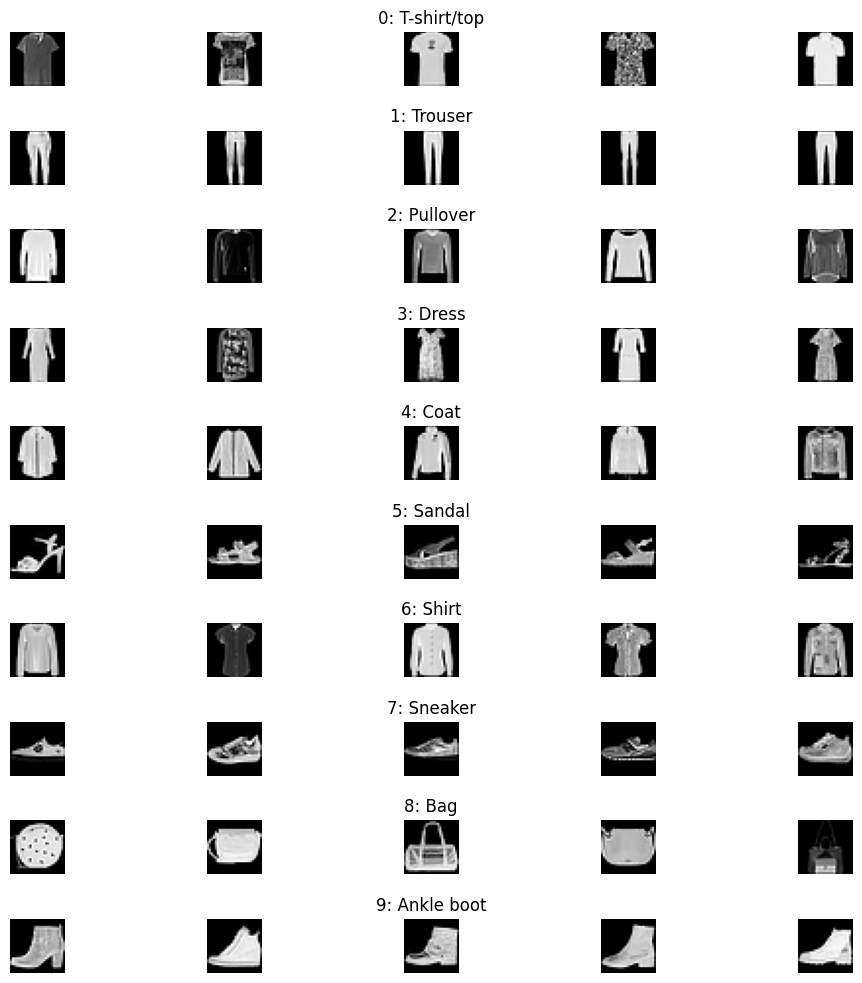

In [441]:
X_class_num = []
n_rows = 10
n_cols = 5 

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
fig.tight_layout()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(n_cols):
    for j in range(n_rows):
        x_select = train_images[train_labels == j]  # Select images based on their labels
        random_index = random.randint(0, len(x_select) - 1)  # Randomly select an index
        ax[j][i].imshow(x_select[random_index].reshape(28, 28), cmap="gray")  # Reshape the image to 28x28
        ax[j][i].axis("off")
   
        if i == 2:
            label = f"{j}: {class_names[j]}"  # Combine class number and name
            ax[j][i].set_title(label)  # Set the title as the class number and name
            X_class_num.append(len(x_select))

plt.show()


**Insights**

* This Plot randomly select the 5 images for each class 0-9 with its name.

* Labels<br>
Each training and test example is assigned to one of the following labels:<br>
<br>
0 : T-shirt/top<br>
1 : Trouser<br>
2 : Pullover<br>
3 : Dress<br>
4 : Coat<br>
5 : Sandal<br>
6 : Shirt<br>
7 : Sneaker<br>
8 : Bag<br>
9 : Ankle boot

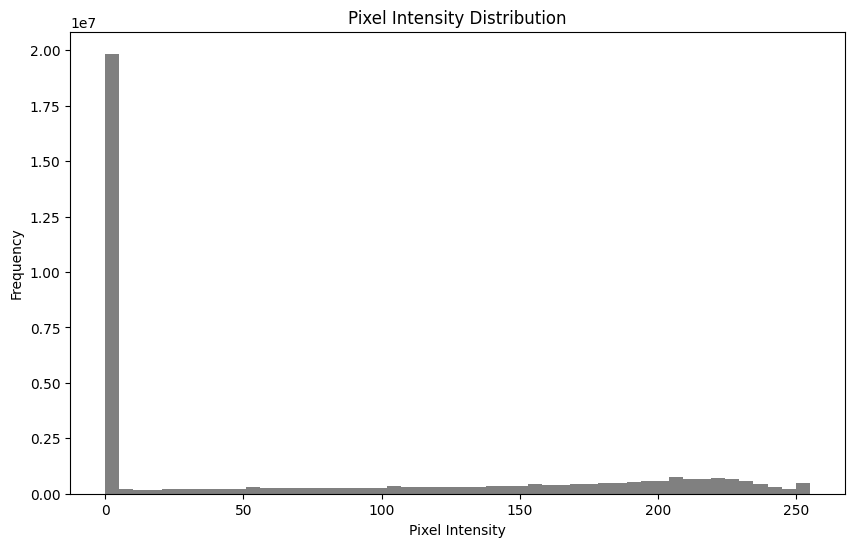

In [442]:
plt.figure(figsize=(10, 6))
plt.hist(train_images.flatten(), bins=50, color='gray')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


**Insights**

* This plot visualize the distribution of pixel intensities across the dataset. This helps in understanding the range of pixel values and how frequently its occured in our training dataset.
* In our dataset around 2.0 * 10^7 pixels have nearly 0 values, which indicate the blank space around our images and other pixels values represent gray scale, and near 255 pixel intensity indicate white color.

#### **2.1 Image Specific EDA**

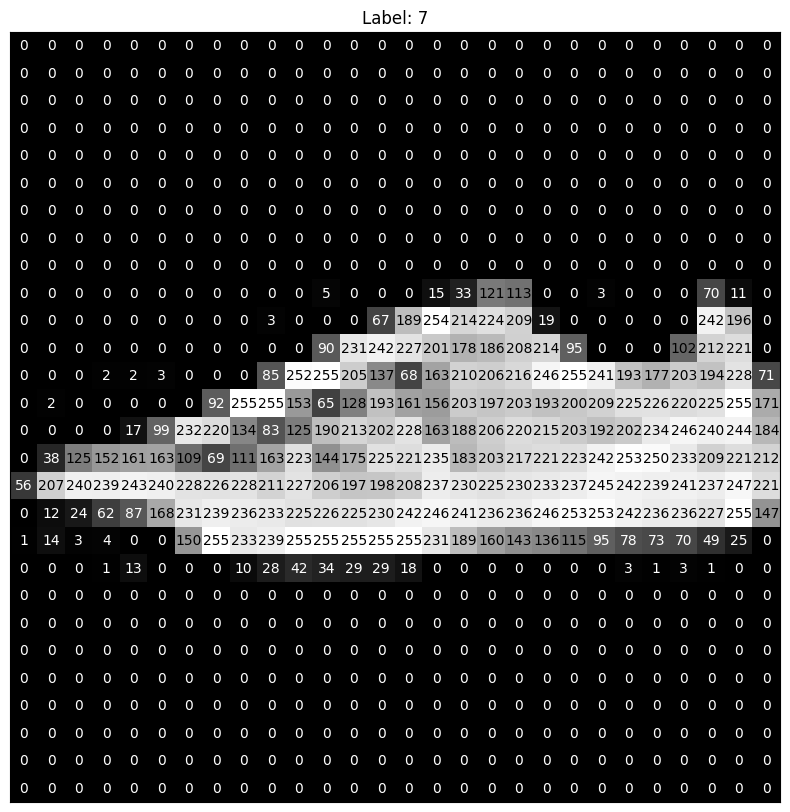

In [443]:
# Show the pixel values on specific image

def visualize_input(i, ax, X, y):
    img = X[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

# Modify the parameters according to your data structure
for i in range(1): 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    visualize_input(i, ax, train_images, train_labels)


**Insights**

* Representation of pixel values and the gray scale color associated with each pixel values from 0 to 255. so, basically its pixel intensity for image.

The label associated with Image:  7


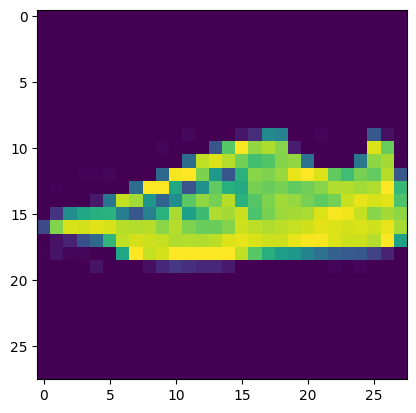

In [444]:
# Print the Image and its Label
plt.imshow(train_images[0])
print("The label associated with Image: ", train_labels[0])

**Insights**

* The first image at 0 index with label of 7 (Sneaker)

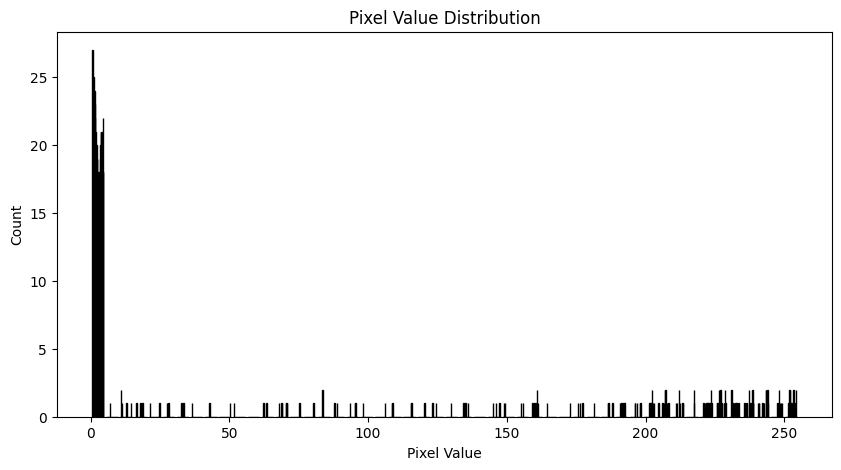

In [445]:
# Plot the distribution of pixel values
fig = plt.figure(figsize=(10, 5))
plt.hist(train_images[0], bins=50, edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

**Insights**

* Pixel values distribution of the first image at index '0'.

#### **3. Data Pre-Processing**

In [446]:
# flattening the 28x28 image into dim=1 (784,) vector 
train_images = train_images.reshape((48000, 28 * 28))
val_images = val_images.reshape((12000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# normalizing the data to the range [0,1] by min-max range, and casting it to float32
train_images = train_images.astype("float32") / 255  
val_images = val_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [447]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(48000, 784)
(784,)


#### **4. Define and Train the Model**

In [448]:
# Define the model
model = keras.Sequential([
    # feedforward neural network with two hidden layers 
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    # an output layer with 10 neurons using the softmax activation function.
    layers.Dense(10, activation='softmax')
])


In [449]:
# Compile the model

# compiles the model using the Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [450]:
# Train the model

# Trains the model on the training data for 10 epochs with a batch size of 32 and uses 20% of the training data for validation.
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


1200/1200 [==============================] - 3s 2ms/step - loss: 0.5341 - accuracy: 0.8126 - val_loss: 0.4092 - val_accuracy: 0.8510
Epoch 2/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8564 - val_loss: 0.3799 - val_accuracy: 0.8609
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3527 - accuracy: 0.8701 - val_loss: 0.3373 - val_accuracy: 0.8735
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3286 - accuracy: 0.8795 - val_loss: 0.3371 - val_accuracy: 0.8741
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3052 - accuracy: 0.8867 - val_loss: 0.3401 - val_accuracy: 0.8764
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2909 - accuracy: 0.8916 - val_loss: 0.3139 - val_accuracy: 0.8864
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2789 - accuracy: 0.8970 - val_loss: 0.3193 - val_accuracy: 0.8838
Epo

#### **5. Model Evaluation**

In [451]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Predictions on the validation dataset
y_pred = model.predict(val_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
val_accuracy = accuracy_score(val_labels, y_pred_classes)
val_precision = precision_score(val_labels, y_pred_classes, average='weighted')
val_recall = recall_score(val_labels, y_pred_classes, average='weighted')
val_f1 = f1_score(val_labels, y_pred_classes, average='weighted')

print("\nAccuracy on validation dataset:", val_accuracy)
print("Precision on validation dataset:", val_precision)
print("Recall on validation dataset:", val_recall)
print("F1 Score on validation dataset:", val_f1)

  1/375 [..............................] - ETA: 7s - loss: 0.2511 - accuracy: 0.9375

375/375 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8863
Validation Loss: 0.32982394099235535
Validation Accuracy: 0.8862500190734863
375/375 [==============================] - 0s 910us/step

Accuracy on validation dataset: 0.88625
Precision on validation dataset: 0.8874520193627725
Recall on validation dataset: 0.88625
F1 Score on validation dataset: 0.8866623829861411


**Insights**

1. **Validation Loss:** The validation loss is approximately 0.329, indicating the average loss on the validation dataset. A lower validation loss suggests better performance of the model on unseen data.

2. **Validation Accuracy:** The validation accuracy is approximately 88.62%. This indicates that the model correctly predicts the class labels for around 87.92% of the samples in the validation dataset.

3. **Precision on Validation Dataset:** The precision on the validation dataset is approximately 88.74%. Precision measures the proportion of correctly predicted positive samples among all samples predicted as positive. A high precision indicates a low false positive rate.

4. **Recall on Validation Dataset:** The recall on the validation dataset is approximately 88.62%. Recall measures the proportion of correctly predicted positive samples among all actual positive samples. A high recall indicates a low false negative rate.

5. **F1 Score on Validation Dataset:** The F1 score on the validation dataset is approximately 88.66%. The F1 score is the harmonic mean of precision and recall, providing a balanced measure between precision and recall. It is useful when the class distribution is imbalanced.

#### **6. Run model on Test set**

In [452]:
from sklearn.metrics import confusion_matrix, classification_report

# Run the trained model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
print("\n Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(test_labels, y_pred_classes)
print("\n Classification Report:")
print(class_report)



313/313 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8777
Test Loss: 0.3649178445339203
Test Accuracy: 0.8776999711990356
313/313 [==============================] - 0s 907us/step

 Confusion Matrix:
[[809   2  30  18   3   2 131   0   5   0]
 [  0 960   1  34   2   0   2   0   1   0]
 [ 13   0 811   8  85   0  82   0   1   0]
 [ 24   4  17 873  52   0  29   0   1   0]
 [  1   0 105  22 805   0  63   0   4   0]
 [  0   0   0   1   0 964   0  19   0  16]
 [101   3 107  21  67   0 688   0  13   0]
 [  0   0   0   0   0  24   0 963   1  12]
 [  4   1   7   5   7   5   3   4 964   0]
 [  0   0   0   0   0  13   1  46   0 940]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.81      0.78      1000
           3       0.89      0.87      0.88      1000
           4       0.79      0.81      0.80

#### **Conclusion**

* The test loss is approximately 0.364, indicating the average loss on the test dataset.

* The test accuracy is approximately 88%, which suggests that the model correctly predicts the class labels for around 87.12% of the samples in the test dataset.

* Confusion Matrix:

1. Diagonal Elements:<br>
<br>
The diagonal elements represent the counts of correctly classified samples for each class.
For example:<br>
Class 0: 809 samples were correctly classified.<br>
Class 1: 960 samples were correctly classified.<br>
Class 2: 811 samples were correctly classified.<br>
Class 3: 873 samples were correctly classified.<br>
Class 4: 805 samples were correctly classified.<br>
Class 5: 964 samples were correctly classified.<br>
Class 6: 688 samples were correctly classified.<br>
Class 7: 963 samples were correctly classified.<br>
Class 8: 964 samples were correctly classified.<br>
Class 9: 940 samples were correctly classified.

2. Off-diagonal Elements:<br>
<br>
Off-diagonal elements represent misclassifications.
For example:<br>
Class 0 was misclassified as Class 2, 13 times.<br>
Class 0 was misclassified as Class 3, 24 times.<br>
Class 0 was misclassified as Class 6, 101 times.

* **Classification Report:**<br>

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |    0.81   |  0.87  |   0.84   |   1000  |
|   1   |    0.99   |  0.97  |   0.98   |   1000  |
|   2   |    0.82   |  0.74  |   0.77   |   1000  |
|   3   |    0.90   |  0.87  |   0.89   |   1000  |
|   4   |    0.72   |  0.88  |   0.79   |   1000  |
|   5   |    0.99   |  0.93  |   0.96   |   1000  |
|   6   |    0.75   |  0.64  |   0.69   |   1000  |
|   7   |    0.84   |  0.99  |   0.91   |   1000  |
|   8   |    0.97   |  0.97  |   0.97   |   1000  |
|   9   |    0.97   |  0.86  |   0.91   |   1000  |
|-------|-----------|--------|----------|---------|
|Average|    0.88   |  0.88  |   0.88   |  10000  |

* **Precision (0.88):** 88% of the predicted positive instances are actually positive.

* **Recall (0.88):** 88% of the actual positive instances are correctly identified by the model.

* **F1-Score (0.88):** Balanced measure of precision and recall, indicating overall good performance in classification tasks.

The model's performance on the test dataset is commendable, achieving an accuracy of 88%. The precision, recall, and F1-score are also impressive, with values of approximately 0.88, 0.88, and 0.88 respectively. The confusion matrix provides detailed insights into the model's classification performance, revealing both correct classifications and common misclassifications across different classes. Overall, these results indicate that the model effectively generalizes to unseen data and performs well in classifying the given dataset.


#### **7. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.** 

* the way to increase the precision for a specific class without changing the model or retraining is by adjusting the classification threshold. By setting a higher threshold for classifying instances as class '5', we can potentially increase the precision for that class. 

In [453]:
# Calculate precision for class '5' before modification
precision_class_5_before = precision_score(test_labels, y_pred_classes, labels=[5], average='macro', zero_division=0)
print("Precision for class '5' before modification:", precision_class_5_before)

# Define the original model predictions
y_pred_prob = model.predict(test_images)

# Set a higher threshold for classifying instances as class '5'
threshold = 0.9 

# Modify predictions based on the threshold
# Make a copy of original predictions
y_pred_classes_modified = y_pred_classes.copy() 
# Assign class '5' to class '0' if below threshold and originally classified as class '5'
y_pred_classes_modified[(y_pred_prob[:, 5] < threshold) & (y_pred_classes_modified == 5)] = 0 

# Calculate precision for class '5' after modification
precision_class_5 = precision_score(test_labels, y_pred_classes_modified, labels=[5], average='macro', zero_division=0)
print("Precision for class '5' after modification:", precision_class_5)


Precision for class '5' before modification: 0.9563492063492064
  1/313 [..............................] - ETA: 12s

313/313 [==============================] - 0s 1ms/step
Precision for class '5' after modification: 0.9812304483837331


* After setting the threshold value to 0.9 we can clearly see that there is minor (0.03 points) increased in precision for class '5'.

#### **8. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.**

* To increase the recall for class '5', I adjust the threshold in a similar manner as I did for precision. However, this time, I decrease the threshold so that more instances are classified as class '5', which can help me increase recall for this class.

In [454]:
# Calculate recall for class '5' before modification
recall_class_5_before = recall_score(test_labels, y_pred_classes, labels=[5], average='macro', zero_division=0)
print("Recall for class '5' before modification:", recall_class_5_before)

# Define the original model predictions
y_pred_prob = model.predict(test_images)

# Set a lower threshold for classifying instances as class '5'
threshold = 0.1

# Modify predictions based on the threshold
# Make a copy of original predictions
y_pred_classes_modified = y_pred_classes.copy()  
# Assign class '5' to instances above threshold and not originally classified as class '5'
y_pred_classes_modified[(y_pred_prob[:, 5] >= threshold) & (y_pred_classes_modified != 5)] = 5 

# Calculate recall for class '5' after modification
recall_class_5 = recall_score(test_labels, y_pred_classes_modified, labels=[5], average='macro', zero_division=0)
print("Recall for class '5' after modification:", recall_class_5)



Recall for class '5' before modification: 0.964
313/313 [==============================] - 0s 1ms/step
Recall for class '5' after modification: 0.98


* After changing the threshold value to 0.1, there was a minor increase in the recall for class '5', rising from 0.964 to 0.98.